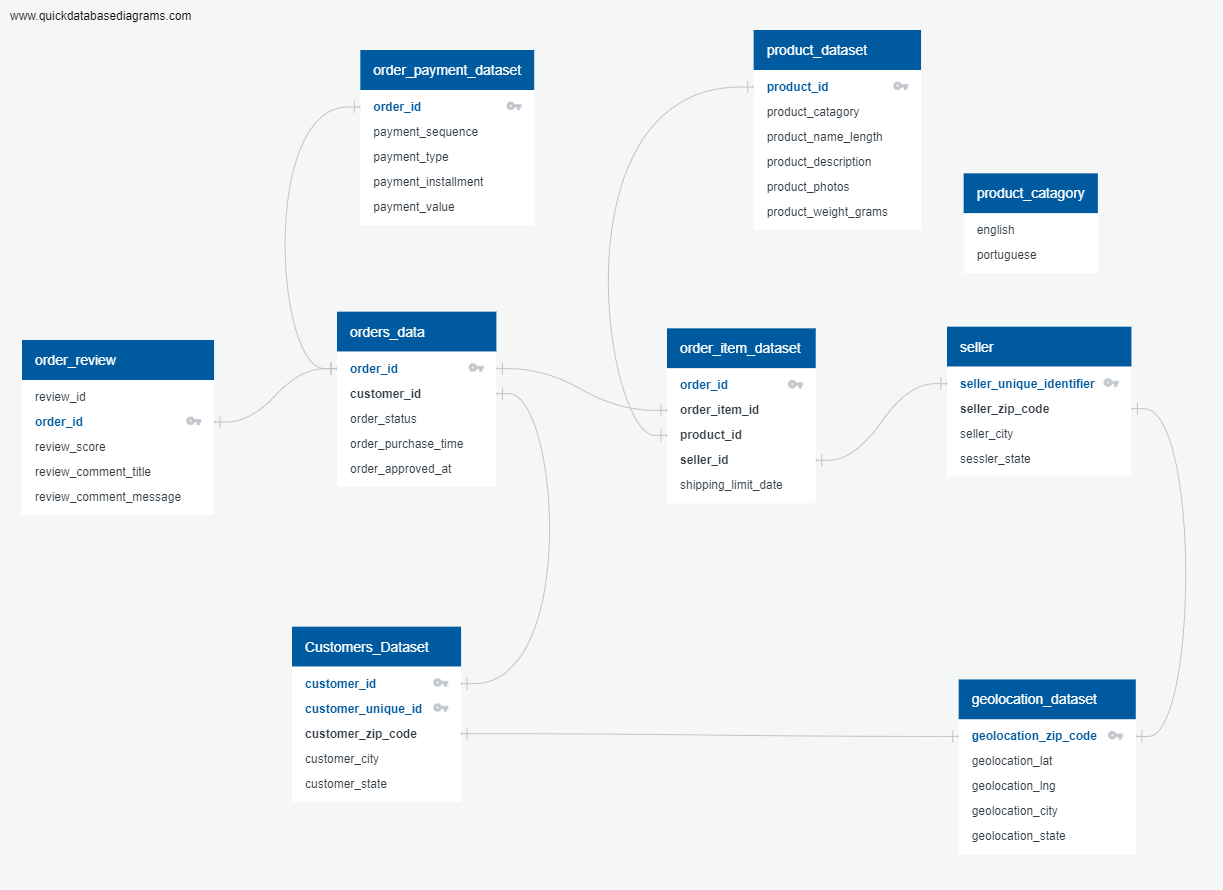

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
parse_dates = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", "review_creation_date", "review_answer_timestamp" ]
customers =  pd.read_csv("../final_database/olist_final_data.csv", infer_datetime_format = True, parse_dates = parse_dates)


In [3]:
customers.head()


,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_city,seller_state
0,91340,porto alegre,RS,-30.028941,-51.180072,3ccb27f9c7ee205656acef98c19fc061,delivered,2018-04-16,2018-04-16,2018-05-08,...,1,credit_card,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,campinas,SP
1,13635,pirassununga,SP,-21.971013,-47.426693,5f7f9c1ee727aca3b625220c95177f4f,delivered,2018-05-09,2018-05-11,2018-05-16,...,1,boleto,1,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,franca,SP
2,37975,itau de minas,MG,-20.746977,-46.749023,c4cb1295499744937c6be430505b7003,delivered,2018-08-07,2018-08-07,2018-08-08,...,1,credit_card,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,curitiba,PR
3,35720,matozinhos,MG,-19.559993,-44.085206,3f35b35a0b55d214f94c94c9e1a1deaa,delivered,2017-06-15,2017-06-15,2017-06-19,...,1,credit_card,1,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,aperibe,RJ
4,36700,leopoldina,MG,-21.526803,-42.641060,11ca735fecae936dacfea16499b4b4d7,delivered,2017-05-02,2017-05-03,2017-05-08,...,1,credit_card,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,ibitinga,SP


In [4]:
customers["time_order_to_delivery"] = customers["order_delivered_customer_date"]-customers["order_purchase_timestamp"]
customers["time_estimate_to_delivery"] = customers["order_estimated_delivery_date"]-customers["order_delivered_customer_date"]

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   zipcode                        91596 non-null  int64          
 1   customer_city                  91596 non-null  object         
 2   customer_state                 91596 non-null  object         
 3   geolocation_lat                91596 non-null  float64        
 4   geolocation_lng                91596 non-null  float64        
 5   customer_id                    91596 non-null  object         
 6   order_status                   91596 non-null  object         
 7   order_purchase_timestamp       91596 non-null  datetime64[ns] 
 8   order_approved_at              91596 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   91596 non-null  datetime64[ns] 
 10  order_delivered_customer_date  91596 non-null  datetime64[ns] 
 11  or

In [6]:
customers.head(5)

,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_city,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,porto alegre,RS,-30.028941,-51.180072,3ccb27f9c7ee205656acef98c19fc061,delivered,2018-04-16,2018-04-16,2018-05-08,...,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,campinas,SP,30 days,6 days
1,13635,pirassununga,SP,-21.971013,-47.426693,5f7f9c1ee727aca3b625220c95177f4f,delivered,2018-05-09,2018-05-11,2018-05-16,...,1,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,franca,SP,12 days,11 days
2,37975,itau de minas,MG,-20.746977,-46.749023,c4cb1295499744937c6be430505b7003,delivered,2018-08-07,2018-08-07,2018-08-08,...,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,curitiba,PR,6 days,9 days
3,35720,matozinhos,MG,-19.559993,-44.085206,3f35b35a0b55d214f94c94c9e1a1deaa,delivered,2017-06-15,2017-06-15,2017-06-19,...,1,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,aperibe,RJ,11 days,14 days
4,36700,leopoldina,MG,-21.526803,-42.641060,11ca735fecae936dacfea16499b4b4d7,delivered,2017-05-02,2017-05-03,2017-05-08,...,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,ibitinga,SP,15 days,9 days


In [7]:
customers["order_item_id"].value_counts()

1    91596
Name: order_item_id, dtype: int64

In [8]:
customers.describe()

,zipcode,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_photos_qty,seller_zip,time_order_to_delivery,time_estimate_to_delivery
count,91596.000000,91596.000000,91596.000000,91596.0,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596.000000,91596,91596
mean,35151.534860,-21.191323,-46.183740,1.0,125.912610,20.219324,4.143543,1.022403,2.902245,157.746153,2.257380,24701.768265,12 days 11:53:24.768767195,11 days 20:27:29.783833355
std,29817.795762,5.624239,4.067344,0.0,191.014876,15.918591,1.294079,0.234388,2.698356,217.626161,1.751246,27781.816702,9 days 14:03:45.709485852,10 days 04:24:34.611794700
min,1003.000000,-36.605374,-72.666706,1.0,0.850000,0.000000,1.000000,1.000000,0.000000,0.010000,1.000000,1001.000000,0 days 00:00:00,-188 days +00:00:00
25%,11360.000000,-23.589946,-48.119645,1.0,41.900000,13.330000,4.000000,1.000000,1.000000,60.090000,1.000000,6429.000000,7 days 00:00:00,7 days 00:00:00
50%,24431.000000,-22.925733,-46.632051,1.0,79.000000,16.400000,5.000000,1.000000,2.000000,103.160000,2.000000,13573.000000,10 days 00:00:00,12 days 00:00:00
75%,58745.000000,-20.134916,-43.616854,1.0,139.900000,21.280000,5.000000,1.000000,4.000000,175.090000,3.000000,29156.000000,16 days 00:00:00,17 days 00:00:00
max,99980.000000,42.184003,-8.577855,1.0,6735.000000,409.680000,5.000000,19.000000,24.000000,13664.080000,20.000000,99730.000000,210 days 00:00:00,147 days 00:00:00


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   zipcode                        91596 non-null  int64          
 1   customer_city                  91596 non-null  object         
 2   customer_state                 91596 non-null  object         
 3   geolocation_lat                91596 non-null  float64        
 4   geolocation_lng                91596 non-null  float64        
 5   customer_id                    91596 non-null  object         
 6   order_status                   91596 non-null  object         
 7   order_purchase_timestamp       91596 non-null  datetime64[ns] 
 8   order_approved_at              91596 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   91596 non-null  datetime64[ns] 
 10  order_delivered_customer_date  91596 non-null  datetime64[ns] 
 11  or

In [ ]:
profile = ProfileReport(customers, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

In [ ]:
corr_matrix = customers.corr()
corr_matrix["review_score"].sort_values(ascending=False)

In [10]:
final_customers = customers.drop(columns = ["customer_city", "customer_state", "geolocation_lat","geolocation_lng", "customer_id", "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "payment_sequential"])              
final_customers.drop(columns =["seller_city", "order_id", "review_answer_timestamp", "review_creation_date"], inplace = True)
final_customers.drop(columns =["seller_id","payment_installments", "order_item_id" ], inplace = True)
final_customers.drop(columns =["order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", "review_id"], inplace = True)
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,delivered,149.9,15.93,2,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,SP,30 days,6 days
1,13635,delivered,49.9,12.79,5,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,SP,12 days,11 days
2,37975,delivered,59.9,27.37,5,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,PR,6 days,9 days
3,35720,delivered,15.5,15.10,4,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,RJ,11 days,14 days
4,36700,delivered,143.0,15.17,5,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,SP,15 days,9 days


# Feature Engineering

#### review score

In [11]:
def partition(x):
    if x < 3:
        return 0
    return 1
final_customers['review_score']=final_customers['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score 
final_customers.review_score.value_counts()

1    79613
0    11983
Name: review_score, dtype: int64

#### delivery Status

In [12]:
def partition(x):
    if x == "delivered":
        return 1
    return 0
final_customers['order_status']=final_customers['order_status'].map(lambda cw : partition(cw) ) 
    
# checking the review score 
final_customers.order_status.value_counts()

1    91590
0        6
Name: order_status, dtype: int64

#### time_order_to_delivery"

In [13]:
final_customers["time_order_to_delivery"] = final_customers.time_order_to_delivery.apply(lambda x: x.days)
final_customers["time_estimate_to_delivery"] = final_customers.time_estimate_to_delivery.apply(lambda x: x.days)



In [14]:
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,seller_state,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,SP,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,SP,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,PR,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,RJ,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,SP,15,9


In [15]:
final_customers.drop(columns = ["seller_state"], inplace = True)

In [16]:
final_customers.head()

,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,15,9


In [17]:
final_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    91596 non-null  int64  
 1   order_status               91596 non-null  int64  
 2   price                      91596 non-null  float64
 3   freight_value              91596 non-null  float64
 4   review_score               91596 non-null  int64  
 5   payment_type               91596 non-null  object 
 6   payment_value              91596 non-null  float64
 7   product_id                 91596 non-null  object 
 8   product_photos_qty         91596 non-null  int64  
 9   product_category           91596 non-null  object 
 10  seller_zip                 91596 non-null  int64  
 11  time_order_to_delivery     91596 non-null  int64  
 12  time_estimate_to_delivery  91596 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usag

#### Product catagories

In [18]:
final_customers["product_category"] = final_customers["product_category"].astype('category')
print(final_customers.dtypes)
final_customers["product_category"] = final_customers["product_category"].cat.codes
final_customers.head()


zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                   object
payment_value                 float64
product_id                     object
product_photos_qty              int64
product_category             category
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,70,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,a70d74f54feefedd8108c45553766340,1,33,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,7,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,e4d1cdc6559e08672c98c73a21305521,1,65,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,7,14940,15,9


# payment type

In [19]:
final_customers["product_id"] = final_customers["product_id"].astype('category')
print(final_customers.dtypes)
final_customers["product_id"] = final_customers["product_id"].cat.codes
final_customers.head()

zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                   object
payment_value                 float64
product_id                   category
product_photos_qty              int64
product_category                 int8
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,credit_card,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,boleto,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,credit_card,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,credit_card,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,credit_card,316.34,29043,1,7,14940,15,9


In [20]:
final_customers["payment_type"] = final_customers["payment_type"].astype('category')
print(final_customers.dtypes)
final_customers["payment_type"] = final_customers["payment_type"].cat.codes
final_customers.head()

zipcode                         int64
order_status                    int64
price                         float64
freight_value                 float64
review_score                    int64
payment_type                 category
payment_value                 float64
product_id                      int16
product_photos_qty              int64
product_category                 int8
seller_zip                      int64
time_order_to_delivery          int64
time_estimate_to_delivery       int64
dtype: object


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,1,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,0,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,1,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,1,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,1,316.34,29043,1,7,14940,15,9


In [21]:
#final_customers = pd.get_dummies(final_customers, columns=["product_id","payment_type" ])

In [22]:
#final_customers.head()

In [23]:
final_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91596 entries, 0 to 91595
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    91596 non-null  int64  
 1   order_status               91596 non-null  int64  
 2   price                      91596 non-null  float64
 3   freight_value              91596 non-null  float64
 4   review_score               91596 non-null  int64  
 5   payment_type               91596 non-null  int8   
 6   payment_value              91596 non-null  float64
 7   product_id                 91596 non-null  int16  
 8   product_photos_qty         91596 non-null  int64  
 9   product_category           91596 non-null  int8   
 10  seller_zip                 91596 non-null  int64  
 11  time_order_to_delivery     91596 non-null  int64  
 12  time_estimate_to_delivery  91596 non-null  int64  
dtypes: float64(3), int16(1), int64(7), int8(2)
mem

In [24]:
final_customers.to_csv("../final_database/final_customer.csv", index = False)

# Conenction with AWS database

In [25]:
import psycopg2
import config 
from config import PGHOST
from config import PGDATABASE
from config import PGUSER
from config import PGPASSWORD


def connect():
    
    # Set up a connection to the postgres server.
    conn_string = f"host={PGHOST} port=5432 dbname={PGDATABASE} user={PGUSER} \
                  password={PGPASSWORD}"
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [26]:
# Connecting to DB
conn, cursor = connect()

# SQL command to create inventory table
create_table = """
    CREATE TABLE IF NOT EXISTS final_customers(
        zipcode INTEGER,
        order_status INTEGER,
        price FLOAT,
        freight_value FLOAT,
        review_score INTEGER,
        payment_type INTEGER,
        payment_value FLOAT,
        product_id INTEGER,
        product_photos_qty INTEGER,
        product_category INTEGER,
        seller_zip INTEGER,
        time_order_to_delivery INTEGER,
        time_estimate_to_delivery INTEGER


    )
    """

# Execute SQL Command and commit to DB
cursor.execute(create_table)
conn.commit()

# Disconnect from DB
#disconnect(conn, cursor)

Connected!


In [27]:
with open('../final_database/final_customer.csv', 'r') as row:
    next(row)# Skip the header row.
    cursor.copy_from(row, 'final_customers', sep=',')
    

    
conn.commit()    

In [28]:
sql = """
SELECT *
FROM final_customers
"""
final_customers_sql = pd.read_sql(sql, con=conn)
final_customers_sql.head()


,zipcode,order_status,price,freight_value,review_score,payment_type,payment_value,product_id,product_photos_qty,product_category,seller_zip,time_order_to_delivery,time_estimate_to_delivery
0,91340,1,149.9,15.93,0,1,165.83,26166,2,70,13101,30,6
1,13635,1,49.9,12.79,1,0,62.69,19339,1,33,14401,12,11
2,37975,1,59.9,27.37,1,1,87.27,25125,2,7,80010,6,9
3,35720,1,15.5,15.10,1,1,30.60,26600,1,65,28495,11,14
4,36700,1,143.0,15.17,1,1,316.34,29043,1,7,14940,15,9


# Split the data

In [29]:
Xdata = final_customers_sql.drop(columns = ["review_score"])
ydata = pd.DataFrame(final_customers_sql['review_score'])

In [30]:
Xdata.shape

(732768, 12)

In [31]:
ydata.shape

(732768, 1)

In [32]:
ydata

,review_score
0,0
1,1
2,1
3,1
4,1
...,...
732763,1
732764,1
732765,0
732766,1


In [33]:
X = Xdata.values
y = ydata.values

# Splitting the dataset into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
print(X_train)

[[1.2090e+04 1.0000e+00 3.9990e+01 ... 8.2500e+03 1.1000e+01 8.0000e+00]
 [6.6630e+03 1.0000e+00 3.6400e+01 ... 2.0300e+03 6.0000e+00 6.0000e+00]
 [3.8610e+04 1.0000e+00 3.3990e+02 ... 2.5645e+04 1.6000e+01 1.4000e+01]
 ...
 [2.3942e+04 1.0000e+00 5.3900e+01 ... 1.5025e+04 1.5000e+01 1.4000e+01]
 [8.3405e+04 1.0000e+00 3.0500e+01 ... 2.3100e+03 1.2000e+01 1.2000e+01]
 [1.3327e+04 1.0000e+00 1.0000e+01 ... 3.1140e+04 1.5000e+01 5.0000e+00]]


In [36]:
print(X_test)

[[ 6.8500e+03  1.0000e+00  3.4900e+02 ...  3.5162e+04  6.0000e+00
   2.0000e+01]
 [ 2.9146e+04  1.0000e+00  5.4390e+01 ...  1.8015e+04  1.1000e+01
   2.0000e+01]
 [ 1.3041e+04  1.0000e+00  9.9900e+01 ...  1.4050e+04  8.0000e+00
   9.0000e+00]
 ...
 [ 2.2220e+04  1.0000e+00  4.5000e+01 ...  2.0400e+03  8.0000e+00
   1.4000e+01]
 [ 9.6015e+04  1.0000e+00  9.9000e+01 ...  9.0230e+04  6.0000e+00
   1.5000e+01]
 [ 4.7850e+04  1.0000e+00  1.3990e+02 ...  3.4310e+03  3.1000e+01
  -1.0000e+00]]


In [37]:
print(y_train)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [38]:
print(y_test)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## Feature Scaling

In [39]:
# rom sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Resampling 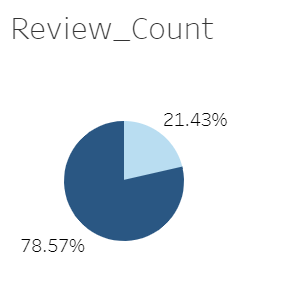

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

In [43]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(Counter(y_resampled))


Counter({0: 477571, 1: 477571})


# Logistic Regression: Linear Model.

In [44]:
from sklearn.linear_model import LogisticRegression
classifierl = LogisticRegression(random_state = 0)
classifierl.fit(X_resampled, y_resampled)

C:\Users\manuu\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [45]:
y_pred_l = classifierl.predict(X_test)
print(np.concatenate((y_pred_l.reshape(len(y_pred_l),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 1]]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logistic = confusion_matrix(y_test, y_pred_l)
print(cm_logistic)

[[ 13375  10484]
 [ 35827 123506]]


In [47]:
accuracy_logistic = accuracy_score(y_test, y_pred_l)
accuracy_logistic

0.7471996593737718

# K-NN model 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifierk = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierk.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [49]:
y_pred_k = classifierk.predict(X_test)
print(np.concatenate((y_pred_k.reshape(len(y_pred_k),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Knn = confusion_matrix(y_test, y_pred_k)
print(cm_Knn)
accuracy_score(y_test, y_pred_k)

[[ 23859      0]
 [   283 159050]]


0.9984551727149658

# Kernel SVM:Non Linear

In [ ]:
from sklearn.svm import SVC
classifiersvm = SVC(kernel = 'linear', random_state = 0)
classifiersvm.fit(X_resampled, y_resampled)

In [ ]:
y_pred_svm = classifiersvm.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
accuracy_svm_nonlinear = accuracy_score(y_test, y_pred_svm)
accuracy_svm_nonlinear

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifierd = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierd.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
y_pred_d = classifierd.predict(X_test)
#print(np.concatenate((y_pred_d.reshape(len(y_pred_d,1), y_test.reshape(len(y_test),1)),1)))

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_d)
print(cm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_d)
accuracy_decision_tree

[[ 23859      0]
 [    47 159286]]


0.9997434385781039

# Ensemble: Randon Forest


In [54]:
from sklearn.ensemble import RandomForestClassifier
classifiere = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifiere.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [55]:
y_pred_e = classifiere.predict(X_test)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_e)
print(cm)
accuracy_random_forest = accuracy_score(y_test, y_pred_e)
accuracy_random_forest

[[ 23859      0]
 [    62 159271]]


0.9996615572732434

[1.23008343e-01 6.28185936e-05 9.85348905e-02 9.58803228e-02
 1.85538759e-02 1.11103747e-01 9.90348245e-02 3.08415896e-02
 5.64755268e-02 8.10955044e-02 1.15453538e-01 1.69955019e-01]
Feature: 0, Score: 0.12301
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.09853
Feature: 3, Score: 0.09588
Feature: 4, Score: 0.01855
Feature: 5, Score: 0.11110
Feature: 6, Score: 0.09903
Feature: 7, Score: 0.03084
Feature: 8, Score: 0.05648
Feature: 9, Score: 0.08110
Feature: 10, Score: 0.11545
Feature: 11, Score: 0.16996


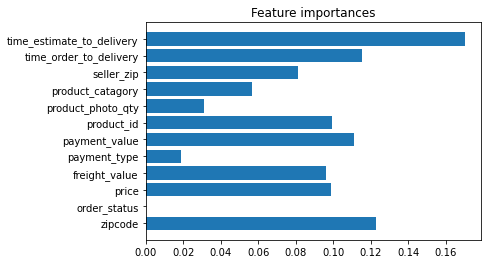

In [57]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot

feature_names = ["zipcode", "order_status", "price", "freight_value", "payment_type", "payment_value", "product_id", "product_photo_qty", "product_catagory", "seller_zip","time_order_to_delivery", "time_estimate_to_delivery"]
# get importance
importance = classifiere.feature_importances_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
plt.title("Feature importances")
plt.yticks(range(X.shape[1]), feature_names)
#plt.ylim([-1, X.shape[1]])
pyplot.show()

# Artificial Neural Networks

In [58]:
import tensorflow as tf

In [59]:
ann_model = tf.keras.models.Sequential()
# First hidden layer
#ann.add(tf.keras.layers.Dense(units=6, activation='relu')
ann_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=12))

# Second hidden layer
ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))


# Output layer
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 65        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the Sequential model together and customize metrics
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = ann_model.fit(X_resampled, y_resampled, epochs=10)


Epoch 1/10
29849/29849 [==============================] - 86s 3ms/step - loss: 8.5545 - accuracy: 0.5778
Epoch 2/10
29849/29849 [==============================] - 82s 3ms/step - loss: 0.7244 - accuracy: 0.5996
Epoch 3/10
29849/29849 [==============================] - 64s 2ms/step - loss: 0.6233 - accuracy: 0.6391
Epoch 4/10
29849/29849 [==============================] - 63s 2ms/step - loss: 0.6150 - accuracy: 0.6484
Epoch 5/10
29849/29849 [==============================] - 64s 2ms/step - loss: 0.6125 - accuracy: 0.6499
Epoch 6/10
29849/29849 [==============================] - 64s 2ms/step - loss: 0.6100 - accuracy: 0.6508
Epoch 7/10
29849/29849 [==============================] - 66s 2ms/step - loss: 0.6081 - accuracy: 0.6523
Epoch 8/10
29849/29849 [==============================] - 62s 2ms/step - loss: 0.6062 - accuracy: 0.6534
Epoch 9/10
29849/29849 [==============================] - 62s 2ms/step - loss: 0.6055 - accuracy: 0.6544
Epoch 10/10
29849/29849 [==============================

# Comparison

In [ ]:
# initialize list of lists
data = [['Logistic', accuracy_logistic*100],['SVM Nonlinear', accuracy_svm_nonlinear*100], ['Decision Tree', accuracy_decision_tree*100], ['Random_Forest', accuracy_random_forest*100], ["Ann", 0.8697*100] ]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
df.set_index('Model',inplace = True)
 
# print dataframe.
df

In [ ]:
df.plot(kind='bar', figsize=(20, 5))
plt.title('Model Accuracies')
plt.ylabel('% Accuracy')

# Clustering


In [ ]:
X_kmeans = pd.DataFrame(customers['review_score'])
X_kmeans["time_estimate_to_delivery"] = final_customers_sql["time_estimate_to_delivery"]
X_kmeans.head()
X_Kmeans = X_kmeans.values
X_Kmeans

In [ ]:
# Create an elbow curve to find the best value for K.
#Using the pcs_df DataFrame, create an elbow curve using hvPlot to find the best value for K.
from sklearn.cluster import KMeans
import hvplot.pandas
inertia = []
k = list(range(1, 11))
for i in k:
    kmodel= KMeans(n_clusters=i, random_state=0)
    kmodel.fit(X_Kmeans)
    inertia.append(kmodel.inertia_)
#pd.DataFrame to use hvplot
inertia_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(inertia_data)

#then hvplot to make my elbow curve
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

In [ ]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=8)

# Fit the model

model.fit(X_Kmeans)

# Predict clusters

y_kmeans = model.predict(X_Kmeans)
y_kmeans

In [ ]:
df_y = pd.DataFrame(y_kmeans, columns=['Cluster'])
combined = X_kmeans.join(df_y, how='inner')

combined.tail()

In [ ]:
plt.scatter(X_Kmeans[y_kmeans == 0, 0], X_Kmeans[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_Kmeans[y_kmeans == 1, 0], X_Kmeans[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_Kmeans[y_kmeans == 2, 0], X_Kmeans[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Reviews')
plt.ylabel('Late Deliver')
plt.legend()
plt.show()

In [ ]:
# Create an elbow curve to find the best value for K.
#Using the pcs_df DataFrame, create an elbow curve using hvPlot to find the best value for K.
from sklearn.cluster import KMeans
import hvplot.pandas
inertia = []
k = list(range(1, 11))
for i in k:
    kmodel= KMeans(n_clusters=i, random_state=0)
    kmodel.fit(final_customers_sql)
    inertia.append(kmodel.inertia_)
#pd.DataFrame to use hvplot
inertia_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(inertia_data)

#then hvplot to make my elbow curve
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

In [ ]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=8)

# Fit the model

model.fit(final_customers_sql)

# Predict clusters

y_kmeans = model.predict(final_customers_sql)
y_kmeans

In [ ]:
df_y = pd.DataFrame(y_kmeans, columns=['Cluster'])
combined = final_customers_sql.join(df_y, how='inner')

combined.tail()

In [ ]:
combined.boxplot(['zipcode'], by=['Cluster'])

In [ ]:
combined.boxplot(['time_estimate_to_delivery'], by=['Cluster'])

In [ ]:
# plt.scatter(zipcode[y_kmeans == 0, 0], zipcode[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(final_customers_sql[y_kmeans == 1, 0], final_customers_sql[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(final_customers_sql[y_kmeans == 2, 0], final_customers_sql[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# # plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# # plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()